# ECE 3 - Lab 7

## Linear Equations

$\color{#EF5645}{\text{Definition}}$: We say that the function $f:\mathbb{R}^n \rightarrow \mathbb{R}^m$ satistifies the superposition property if, for all scalars $\alpha, \beta$ and all $n$-vectors $x, y$:

$$f(\alpha x + \beta y) = \alpha f(x) + \beta f(y).$$

$\color{#EF5645}{\text{Definition}}$: A function that satisfies superposition is called linear.

$\color{#6D7D33}{\text{Proposition}}$: A function $f:\mathbb{R}^n \rightarrow \mathbb{R}^m$ is linear if and only if, for all $n$-vector $x$, $f(x) = A x$ for some $m \times n$ matrix $A$.



$\color{#047C91}{\text{Exercise 1}}$: Consider a function $f:\mathbb{R}^3 \rightarrow \mathbb{R}^3$ defined by:
$$f\left(\begin{bmatrix}
x_1 \\
x_2 \\
x_3\end{bmatrix}\right) = \begin{bmatrix}
4x_2 +x_3\\
- x_1 + 5 x_2  \\
2 x_3\end{bmatrix}.$$
Find matrix $A$ such that: $f(x) = Ax$ and use Python to verify.


### Answer:
$$A = \begin{bmatrix}
0&4&1 \\
-1&5&0  \\
0&0&2 \end{bmatrix}.$$

In [ ]:
import numpy as np

def f(x1,x2,x3):
  return [4*x2+x3, -x1+5*x2, 2*x3]

A = np.array([[0,4,1],
             [-1,5,0],
             [0,0,2]])
testX = np.array([9,10,4])
print(A@testX)
print(f(testX[0], testX[1], testX[2]))

[44 41  8]
[44, 41, 8]


$\color{#EF5645}{\text{Definition}}$: A function $f:\mathbb{R}^n \rightarrow \mathbb{R}^m$ that is linear plus a constant is called affine. Its general form is:

$$f(x) = Ax+b \quad \text{with $A$ an $m\times n$ matrix and $b$ a $m$-vector}$$

$\color{#6D7D33}{\text{Proposition}}$:
 A function $f:\mathbb{R}^n \rightarrow \mathbb{R}^m$ is affine if and only if, for all scalars $\alpha, \beta$ with $\alpha + \beta = 1$ and all $n$-vectors $x, y$, we have:
$$f(\alpha x + \beta y) = \alpha f(x) + \beta f(y).$$

$\color{#047C91}{\text{Exercise 2}}$:
Why is the property $\alpha + \beta = 1$ important?



### Answers: 

$f(\alpha x + \beta y) = A(\alpha x + \beta y)+b = \alpha Ax + \beta Ay + b$.

$\alpha f(x) + \beta f(y) = \alpha (Ax+b) + \beta (Ay+b) = \alpha Ax + \alpha b + \beta Ay + \beta b$.

In order for these two expression to be equivalent,
$b = \alpha b  + \beta b$. Therefore, $\alpha + \beta = 1$.

$\color{#047C91}{\text{Exercise 3}}$: In class you talked about this problem: "An airplane travels 1200 miles in 4 hours with a tail wind. On the way back, the same trip takes 5 hours, now with a head wind (against the wind). What is the speed of the plane in still air, and what was the wind speed?" and have the following equations: ($x_1$ denotes plane speed in still air, $x_2$ denotes wind speed). Solve this using Python.

In [ ]:
import numpy as np

A = np.array([[4,4],
              [5,-5]])
b = np.array([1200,1200])
np.linalg.solve(A, b)

array([270.,  30.])

## Linear Dynamical Systems

$\color{#EF5645}{\text{Definition}}$: A linear dynamical system is a linear equation describing the evolution of a state over time, and written as:
$$ x_{t+1} = A_t x_t \quad t = 1, 2, ...$$
where:
- $A_t$ are $n \times n$ dynamics matrices,
- $(A_t)_{ij} (x_t)_j$ is contribution to $(x_{t+1})_i$ from $(x_t)_j$.

The system is called time-invariant if $A_t = A$ does not depend on time.

$\color{#047C91}{\text{Exercise 4}}$: Exploring Nice property of Linear Time Invariant System.

How would you find $x_{t+1}$ using only $A$ and $x_0$?

### Answers: 

$x_1 = Ax_0$,

$x_2 = Ax_1 = AAx_0 = A^2x_0$,

...

$x_t = Ax_{t-1} = A^tx_0$,

$x_{t+1} = Ax_t = AA^tx_0 = A^{t+1}x_0$.

# SIR Model

$\color{#EF5645}{\text{Definition}}$: The Susceptible-Infected-Recovered (SIR) model of an epidemic is a linear dynamical system defined on a $4$-vector state $x_t$, that gives the proportion of the population in $4$ infection states:
- Susceptible: can acquire the disease the next day 
- Infected: have the disease 
- Recovered: had the disease, recovered, now immune 
- Deceased: had the disease, and unfortunately died 

$\color{#047C91}{\text{Exercise}}$ Use python to similate the linear dynamical system associated to this epidemic for $10$ days.
- among susceptible population
  - 10% acquires the disease 
  - 90% remain susceptible
- among infected population
  - 3% dies
  - 40% recovers with immunity
  - 7% recover without immunity (i.e., become susceptible) 
  - 50% remain infected
- 100% of immune and dead people remain in their state

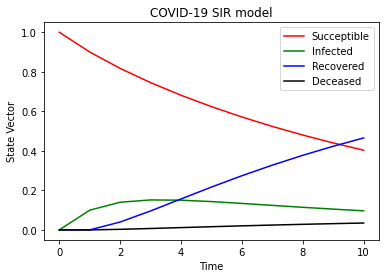

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x0 = np.array([1, 0, 0, 0]) #Initial Condition of the state vector.
A = np.array([
    [0.9, 0.07, 0, 0],
    [0.1, 0.5, 0, 0],
    [0, 0.4, 1, 0],
    [0, 0.03, 0, 1]    
])

# Simulate for the next 10 days
states = np.zeros((11,4))
states[0] = x0

# Use for loop to calculate x_t
for t in range(1,11):
  states[t] = A@states[t-1]

# Plotting
times = np.arange(0, 11, 1)
plt.plot(times, states[:,0], color='red', label='Succeptible')
plt.plot(times, states[:,1], color='green', label='Infected')
plt.plot(times, states[:,2], color='blue', label='Recovered')
plt.plot(times, states[:,3], color='black', label='Deceased')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Time")
plt.ylabel("State Vector")
plt.title("COVID-19 SIR model")
  
# Adding legend
plt.legend()
  
# To load the display window
plt.show()

## Exercise 3 - Matrix Multiplication

### Part (a)

Consider the matrices $\textbf{A}_{n\times m}$, $\textbf{B}_{m\times k}$, and $\textbf{C}_{k\times h}$. Dimensions (row $\times$ column) have been selected such that matrix products are computable.

\\

$\textbf{A} = \begin{bmatrix}
1 & 5 & 10 & 2 \\
2 & 0 & 3 & 23 \\
8 & 9 & 0 & 11
\end{bmatrix}$

$\textbf{B} = \begin{bmatrix}
10 & 6 \\
25 & 1 \\
13 & 0 \\
14& 11 
\end{bmatrix}$

$\textbf{C} = \begin{bmatrix}
5 & 10 & 7 & 8 \\
2 & 12 & 1 & 0
\end{bmatrix}$

\\

Compute the matrix product $\textbf{ABC}$. You may perform $\textbf{(AB)C}$ or $\textbf{A(BC)}$ - either works (due to the Associative Property). **You may input the matrices as numpy arrays and perform the linear algebra that way if you prefer.**

**Write your answer here**

\\

**Answer:** $\textbf{ABC} = \begin{bmatrix}
1531 & 3326 & 2084 & 2344 \\
2435 & 6990 & 2932 & 3048 \\
2651 & 6726 & 3391 & 3672
\end{bmatrix}$

In [4]:
import numpy as np
A = np.array([[1,5,10,2],
             [2,0,3,2],
             [8,9,0,11]])

B = np.array([[10,6],
             [25,1],
             [13,0],
             [14,11]])

C = np.array([[5,10,7,8],
             [2,12,1,0]])
np.matmul(np.matmul(A,B),C)

array([[1531, 3326, 2084, 2344],
       [ 503, 1278,  643,  696],
       [2651, 6726, 3391, 3672]])

### Part (b)

Consider the matrices $\textbf{A}_{nxm}$, $\textbf{B}_{mxk}$, and $\textbf{C}_{mxk}$. Dimensions have been selected so that the operation is computable. 

\\

$\textbf{A} = \begin{bmatrix}
1 & 5 & 10 & 2 \\
2 & 0 & 3 & 23 \\
8 & 9 & 0 & 11
\end{bmatrix}$

$\textbf{B} = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10& 11& 12 
\end{bmatrix}$

$\textbf{C} = \begin{bmatrix}
13& 14& 15 \\
16& 17& 18 \\
19& 20& 21 \\
22& 23& 24 
\end{bmatrix}$

\\

Show the Distributive Property holds by computing $\textbf{A(B + C)}$ and $\textbf{AB + AC}$ and showing that they are equal, ie: $\textbf{A(B + C)} = \textbf{AB + AC}$. **You may input the matrices as numpy arrays and perform the linear algebra that way if you prefer.**

**Write your answer here**

\\

**Answer:** $\textbf{A(B+C)} = \begin{bmatrix}
438 & 474 & 510 \\
842 & 898 & 954 \\
644 & 700 & 756
\end{bmatrix}$

### Part (c)

Consider the matrices $\textbf{A}_{n\times m}$ and $\textbf{B}_{m\times k}$. Dimensions have been selected so that the operation is computable. 

$\textbf{A} = \begin{bmatrix}
1 & 3 & 5 & 7 & 9 \\
11& 13& 15& 17& 19
\end{bmatrix}$

$\textbf{B} = \begin{bmatrix}
2 & 4 & 6 & 8 \\
10& 12& 14& 16\\
18& 20& 22& 24\\
26& 28& 30& 32\\
34& 36& 38& 40
\end{bmatrix}$

\\

Show that the property $\textbf{(AB)}^T = \textbf{(B}^T\textbf{A}^T\textbf{)}$ holds by computing $\textbf{(AB)}^T$ and $\textbf{(B}^T\textbf{A}^T\textbf{)}$ and showing they are equal. **You may input the matrices as numpy arrays and perform the linear algebra that way if you prefer.**

**Write your answer here**

\\

**Answer:** $(\textbf{AB})^T = \begin{bmatrix}
610 & 1510\\
660 & 1660\\
710 & 1810\\
760 & 1960
\end{bmatrix}$

In [10]:
import numpy as np
A = np.array([[1,3,5,7,9],[11,13,15,17,19]])
B = np.array([[2,4,6,8],[10,12,14,16],[18,20,22,24],[26,28,30,32],[34,36,38,40]])
print(np.transpose(np.matmul(A,B)))

print(np.matmul(np.transpose(A),np.transpose(B)))

[[ 610 1510]
 [ 660 1660]
 [ 710 1810]
 [ 760 1960]]


ValueError: ignored